# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [20]:
# Import warnings
import warnings


In [21]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.9.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [23]:
# Try loading one file
df = pd.read_parquet("C:\\Users\\Singhpan\\Exercise_AI_ML\\Datasets_and_Dictionary_NYC\\trip_records\\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [24]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:\\Users\\Singhpan\\Exercise_AI_ML\\Datasets_and_Dictionary_NYC\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)

# initialise an empty dataframe

df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        currentDf = pd.read_parquet(file_path)
        #currentDf.info()
        currentDf["Pick_up_Date"] = currentDf["tpep_pickup_datetime"].dt.date
        currentDf["Pick_up_hour"] = currentDf["tpep_pickup_datetime"].dt.hour
        
        #print(currentDf)
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in currentDf['Pick_up_Date'].unique():
            for hour in range(24):
                # Iterate through each hour of the selected date
                hour_data = currentDf[(currentDf['Pick_up_Date'] == date) & (currentDf['Pick_up_hour'] == hour)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 48)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialized this empty DF earlier
        df = pd.concat([df, sampled_data]) 

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.info()

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']
<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 2749 to 2704796
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount         

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [27]:
# Store the df in csv/parquet
df.to_csv('Final_sampled_data.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [28]:
# Load the new data file
df = pd.read_csv("C:\\Users\\Singhpan\\Exercise_AI_ML\\Datasets_and_Dictionary_NYC\\\\trip_records\\Final_sampled_data.csv")


In [29]:
df.head(10)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        2749         1  2023-01-01 00:04:34   2023-01-01 00:17:32   
1        2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
2        2334         2  2023-01-01 00:21:40   2023-01-01 00:33:52   
3         327         1  2023-01-01 00:15:15   2023-01-01 00:39:30   
4        3224         2  2023-01-01 00:57:19   2023-01-01 01:12:57   
5        3699         2  2023-01-01 00:29:32   2023-01-01 00:48:49   
6        3863         1  2023-01-01 00:09:02   2023-01-01 00:31:45   
7        2257         2  2023-01-01 00:58:46   2023-01-01 01:09:30   
8        1086         2  2023-01-01 00:12:36   2023-01-01 00:37:39   
9        1844         2  2023-01-01 00:28:41   2023-01-01 00:42:19   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.60         1.0                  N   
1              1.0           1.00         1.0                  N   
2              1.0           1.86         1.0                  N   
3              1.0           7.50         1.0                  N   
4              2.0           6.65         1.0                  N   
5              1.0           3.29         1.0                  N   
6              3.0          16.70         2.0                  N   
7              1.0           2.81         1.0                  N   
8              5.0           5.64         1.0                  N   
9              1.0           2.58         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           125           186  ...      0.5        3.00          0.00   
1           237           141  ...      0.5        2.40          0.00   
2           234           144  ...      0.5        3.56          0.00   
3           144           263  ...      0.5        3.00          0.00   
4           261           162  ...      0.5        6.78          0.00   
5           144           229  ...      0.5        3.84          0.00   
6           132           233  ...      0.5       16.35          6.55   
7           137           140  ...      0.5        2.88          0.00   
8            79           238  ...      0.5        8.30          0.00   
9           161           262  ...      0.5        6.18          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.80                   2.5         0.00   
1                    1.0         14.60                   2.5         0.00   
2                    1.0         21.36                   2.5         0.00   
3                    1.0         41.10                   2.5         0.00   
4                    1.0         40.68                   2.5         0.00   
5                    1.0         23.04                   2.5         0.00   
6                    1.0         98.15                   2.5         1.25   
7                    1.0         22.08                   2.5         0.00   
8                    1.0         41.50                   2.5         0.00   
9                    1.0         26.78                   2.5         0.00   

   Pick_up_Date  Pick_up_hour  Airport_fee  
0    2023-01-01             0          NaN  
1    2023-01-01             0          NaN  
2    2023-01-01             0          NaN  
3    2023-01-01             0          NaN  
4    2023-01-01             0          NaN  
5    2023-01-01             0          NaN  
6    2023-01-01             0          NaN  
7    2023-01-01             0          NaN  
8    2023-01-01             0          NaN  
9    2023-01-01             0          NaN  

[10 rows x 23 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Pick_up_Date           object 
 21  Pick_up_hour           int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df.reset_index(drop=True)
df.index.name = 'Index'
df.head(5)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
Index                                                                    
0            2749         1  2023-01-01 00:04:34   2023-01-01 00:17:32   
1            2025         1  2023-01-01 00:28:54   2023-01-01 00:32:40   
2            2334         2  2023-01-01 00:21:40   2023-01-01 00:33:52   
3             327         1  2023-01-01 00:15:15   2023-01-01 00:39:30   
4            3224         2  2023-01-01 00:57:19   2023-01-01 01:12:57   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
Index                                                                  
0                  1.0           1.60         1.0                  N   
1                  1.0           1.00         1.0                  N   
2                  1.0           1.86         1.0                  N   
3                  1.0           7.50         1.0                  N   
4                  2.0           6.65         1.0                  N   

       PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
Index                              ...                                      
0               125           186  ...      0.5        3.00           0.0   
1               237           141  ...      0.5        2.40           0.0   
2               234           144  ...      0.5        3.56           0.0   
3               144           263  ...      0.5        3.00           0.0   
4               261           162  ...      0.5        6.78           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
Index                                                                           
0                        1.0         20.80                   2.5          0.0   
1                        1.0         14.60                   2.5          0.0   
2                        1.0         21.36                   2.5          0.0   
3                        1.0         41.10                   2.5          0.0   
4                        1.0         40.68                   2.5          0.0   

       Pick_up_Date  Pick_up_hour  Airport_fee  
Index                                           
0        2023-01-01             0          NaN  
1        2023-01-01             0          NaN  
2        2023-01-01             0          NaN  
3        2023-01-01             0          NaN  
4        2023-01-01             0          NaN  

[5 rows x 23 columns]

In [16]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
Index                                                                         
0             1  2023-01-01 00:04:34   2023-01-01 00:17:32              1.0   
1             1  2023-01-01 00:28:54   2023-01-01 00:32:40              1.0   
2             2  2023-01-01 00:21:40   2023-01-01 00:33:52              1.0   
3             1  2023-01-01 00:15:15   2023-01-01 00:39:30              1.0   
4             2  2023-01-01 00:57:19   2023-01-01 01:12:57              2.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
Index                                                               
0               1.60         1.0                  N           125   
1               1.00         1.0                  N           237   
2               1.86         1.0                  N           234   
3               7.50         1.0                  N           144   
4               6.65         1.0                  N           261   

       DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
Index                              ...                                      
0               186             1  ...      0.5        3.00           0.0   
1               141             1  ...      0.5        2.40           0.0   
2               144             1  ...      0.5        3.56           0.0   
3               263             1  ...      0.5        3.00           0.0   
4               162             1  ...      0.5        6.78           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
Index                                                                           
0                        1.0         20.80                   2.5          0.0   
1                        1.0         14.60                   2.5          0.0   
2                        1.0         21.36                   2.5          0.0   
3                        1.0         41.10                   2.5          0.0   
4                        1.0         40.68                   2.5          0.0   

       Pick_up_Date  Pick_up_hour Airport_fee  
Index                                          
0        2023-01-01             0         NaN  
1        2023-01-01             0         NaN  
2        2023-01-01             0         NaN  
3        2023-01-01             0         NaN  
4        2023-01-01             0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [32]:
# Combine the two airport fee columns
#df["airport_fee"].value_counts()
df["total_airport_fee"] = df["airport_fee"].combine_first(df["Airport_fee"])
df.drop("Airport_fee", axis=1, inplace=True)
df.drop("airport_fee", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Pick_up_Date           object 
 20  Pick_up_hour           int64  
 21  total_airport_fee      float64
dtypes: float64(12), in

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [33]:
# check where values of fare amount are negative

df_neg_count =  df[df["fare_amount"]<0]
df_neg_count.shape

(0, 22)

Did you notice something different in the `RatecodeID` column for above records?

In [34]:
# Analyse RatecodeID for the negative fare amounts

# no negative fair amount present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Pick_up_Date           object 
 20  Pick_up_hour           int64  
 21  total_airport_fee      float64
dtypes: float64(12), in

In [35]:
# Find which columns have negative values
#total 16 columns having numerical data
negative_col = []
for col in df:
    if (df[col].dtype == "int64") or (df[col].dtype == "float64") :
        negative_values = (df[col] < 0).sum()
        if negative_values > 0:
            negative_col.append(col)
            print(f"{col}' has {negative_values} negative values.")

extra' has 3 negative values.
mta_tax' has 81 negative values.
improvement_surcharge' has 89 negative values.
total_amount' has 89 negative values.
congestion_surcharge' has 61 negative values.
total_airport_fee' has 17 negative values.


In [36]:
# fix these negative values
### Since less negative values so better to mark these zero
### need to fix 6 columns 
print(negative_col)
for column in negative_col:
    df[column] = df[column].clip(lower= 0)


['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'total_airport_fee']


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [37]:
# Find the proportion of missing values in each column

df.isnull().sum()
round(100*(df.isnull().sum()/len(df.index)), 2)

Unnamed: 0               0.0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          3.4
trip_distance            0.0
RatecodeID               3.4
store_and_fwd_flag       3.4
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     3.4
Pick_up_Date             0.0
Pick_up_hour             0.0
total_airport_fee        3.4
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [38]:
# Display the rows with null values
df[df.isnull().sum(axis = 1) >0]
# Impute NaN values in 'passenger_count'
df = df[~np.isnan(df['passenger_count'])]
# check the missing data again after dropping  zero passenger_count
round(100*(df.isnull().sum()/len(df.index)), 2)

Unnamed: 0               0.0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Pick_up_Date             0.0
Pick_up_hour             0.0
total_airport_fee        0.0
dtype: float64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
# No missing value in "RatecodeID" now

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
#Data has been cleaned. No missing values now


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values
#Data has been cleaned up now
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831959 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Pick_up_Date           object 
 20  Pick_up_hour           int64  
 21  total_airport_fee      float64
dtypes: float64(12), int64(6

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.831959e+06     1.831959e+06   1.831959e+06  1.831959e+06   
mean   1.740494e+00     1.371763e+00   3.695685e+00  1.660201e+00   
std    4.383639e-01     8.969737e-01   1.146921e+02  7.548664e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.060000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   1.063523e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.831959e+06  1.831959e+06  1.831959e+06  1.831959e+06  1.831959e+06   
mean   1.653444e+02  1.642555e+02  1.204985e+00  1.985644e+01  1.629999e+00   
std    6.364386e+01  6.979054e+01  4.668819e-01  1.861047e+01  1.836807e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  2.449500e+03  1.375000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.831959e+06  1.831959e+06  1.831959e+06           1.831959e+06   
mean   4.952266e-01  3.586885e+00  6.037129e-01           9.992916e-01   
std    5.454071e-02  4.144423e+00  2.197426e+00           2.500433e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.860000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.470000e+00  0.000000e+00           1.000000e+00   
max    3.301000e+01  7.000000e+02  1.770000e+02           1.000000e+00   

       total_amount  congestion_surcharge  Pick_up_hour  total_airport_fee  
count  1.831959e+06          1.831959e+06  1.831959e+06       1.831959e+06  
mean   2.900380e+01          2.306693e+00  1.429084e+01       1.448797e-01  
std    2.322451e+01          6.677571e-01  5.778702e+00       4.677003e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00       0.000000e+00  
25%    1.596000e+01          2.500000e+00  1.100000e+01       0.000000e+00  
50%    2.100000e+01          2.500000e+00  1.500000e+01       0.000000e+00  
75%    3.080000e+01          2.500000e+00  1.900000e+01       0.000000e+00  
max    2.451000e+03          2.500000e+00  2.300000e+01       1.750000e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [40]:
# remove passenger_count > 6
df = df[(df['passenger_count'] <7)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831934 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Pick_up_Date           object 
 20  Pick_up_hour           int64  
 21  total_airport_fee      float64
dtypes: float64(12), int64(6

In [41]:
# Continue with outlier handling
#remove trip distance with zero and fare amount > 300
df = df[~((df.trip_distance == 0) & (df.fare_amount>200))]

In [42]:
# Do any columns need standardising?
#remove trip distance more than 200 and payment type zero
df = df[~(df.trip_distance > 200)]
# No payment type zero present
df[(df.payment_type == 0)]

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Pick_up_Date, Pick_up_hour, total_airport_fee]
Index: []

[0 rows x 22 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [43]:
df.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Pick_up_Date',
 'Pick_up_hour',
 'total_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Numerical Variables  - passenger_count ,trip distance, trip duration,
Categorical Variables - VendorID,tpep_pickup_datetime, tpep_dropoff_datetime, PULocationID,DOLocationID 

fare_amount,extra,mta_tax,tip_amount.tills_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee -- These are numerical variables


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [44]:
# Find and show the hourly trends in taxi pickups
sns.countplot(x='Pick_up_hour',data=df)
plt.xlabel('Hour')
plt.ylabel('Pickups count')
plt.title('Hourly Trends in Taxi Pickups')


Text(0.5, 1.0, 'Hourly Trends in Taxi Pickups')

Text(0.5, 1.0, 'Weekly Trends in Taxi Pickups')

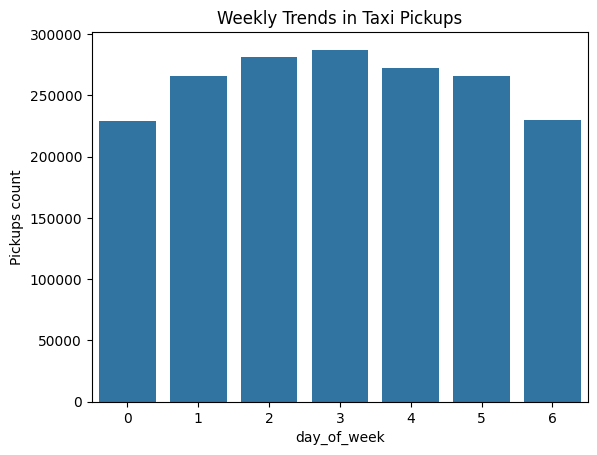

In [45]:
# Find and show the daily trends in taxi pickups (days of the week)
df["day_of_week"] = pd.to_datetime (df["tpep_pickup_datetime"]).dt.day_of_week
sns.countplot(x='day_of_week',data=df)
plt.xlabel
plt.ylabel('Pickups count')
plt.title('Weekly Trends in Taxi Pickups')

Text(0.5, 1.0, 'Monthly Trends in Taxi Pickups')

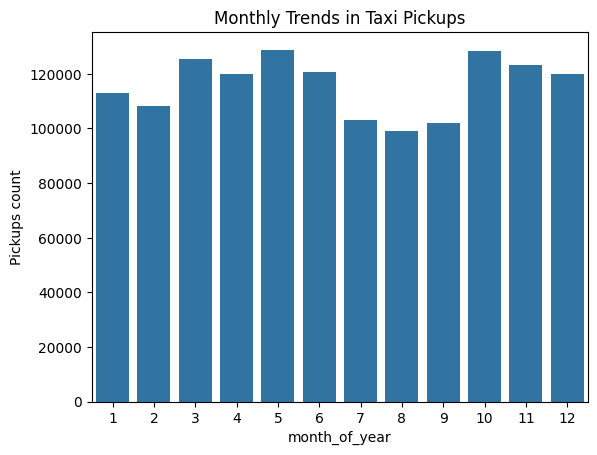

In [50]:
# Show the monthly trends in pickups
df["month_of_year"] = pd.to_datetime (df["tpep_pickup_datetime"]).dt.month
sns.countplot(x='month_of_year',data=df)
plt.xlabel
plt.ylabel('Pickups count')
plt.title('Monthly Trends in Taxi Pickups')


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [46]:
# Analyse the above parameters
# checking all the numerical column for negative value
negative_col = []
for col in df:
    if (df[col].dtype == "int64") or (df[col].dtype == "float64") :
        negative_values = (df[col] < 0).sum()
        if negative_values > 0:
            negative_col.append(col)
            print(f"{col}' has {negative_values} negative values.")
        else:
            print(f"{col}' zero negative values.")

Unnamed: 0' zero negative values.
VendorID' zero negative values.
passenger_count' zero negative values.
trip_distance' zero negative values.
RatecodeID' zero negative values.
PULocationID' zero negative values.
DOLocationID' zero negative values.
payment_type' zero negative values.
fare_amount' zero negative values.
extra' zero negative values.
mta_tax' zero negative values.
tip_amount' zero negative values.
tolls_amount' zero negative values.
improvement_surcharge' zero negative values.
total_amount' zero negative values.
congestion_surcharge' zero negative values.
Pick_up_hour' zero negative values.
total_airport_fee' zero negative values.


In [47]:
# Analyse the above parameters
#checking for missing value (checking for all the numerical column)
for col in df:
    if (df[col].dtype == "int64") or (df[col].dtype == "float64") :
        zero_values = (df[col]== 0).sum()
        if zero_values > 0:
            print(f"{col}' has {zero_values} zero values.")
        else:
            print(f"{col}' No zero  values.")

Unnamed: 0' No zero  values.
VendorID' No zero  values.
passenger_count' has 29351 zero values.
trip_distance' has 21993 zero values.
RatecodeID' No zero  values.
PULocationID' No zero  values.
DOLocationID' No zero  values.
payment_type' No zero  values.
fare_amount' has 614 zero values.
extra' has 702413 zero values.
mta_tax' has 17480 zero values.
tip_amount' has 409883 zero values.
tolls_amount' has 1681171 zero values.
improvement_surcharge' has 790 zero values.
total_amount' has 370 zero values.
congestion_surcharge' has 141525 zero values.
Pick_up_hour' has 51016 zero values.
total_airport_fee' has 1668583 zero values.


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes. cause zero values in above column means impractical data and is not good to analyze. SO better to drop all these.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [48]:
# Create a df with non zero entries for the selected parameters.
 #### No negative or zero values found
#Drop the all zero values of columns- passenger_count,total_amount,fare_amount,trip_distance,tip_amount
df = df[~(df.passenger_count== 0)]
#fare_ amount
df = df[~(df.fare_amount== 0)]
#total_amount 
df = df[~(df.total_amount== 0)]
#tip_amount
df = df[~(df.tip_amount== 0)]
#trip_distance
df = df[~(df.trip_distance== 0)]
# also remove trip distance >100 as it comes in outlier
df = df[~(df.trip_distance > 100)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392045 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1392045 non-null  int64  
 1   VendorID               1392045 non-null  int64  
 2   tpep_pickup_datetime   1392045 non-null  object 
 3   tpep_dropoff_datetime  1392045 non-null  object 
 4   passenger_count        1392045 non-null  float64
 5   trip_distance          1392045 non-null  float64
 6   RatecodeID             1392045 non-null  float64
 7   store_and_fwd_flag     1392045 non-null  object 
 8   PULocationID           1392045 non-null  int64  
 9   DOLocationID           1392045 non-null  int64  
 10  payment_type           1392045 non-null  int64  
 11  fare_amount            1392045 non-null  float64
 12  extra                  1392045 non-null  float64
 13  mta_tax                1392045 non-null  float64
 14  tip_amount             

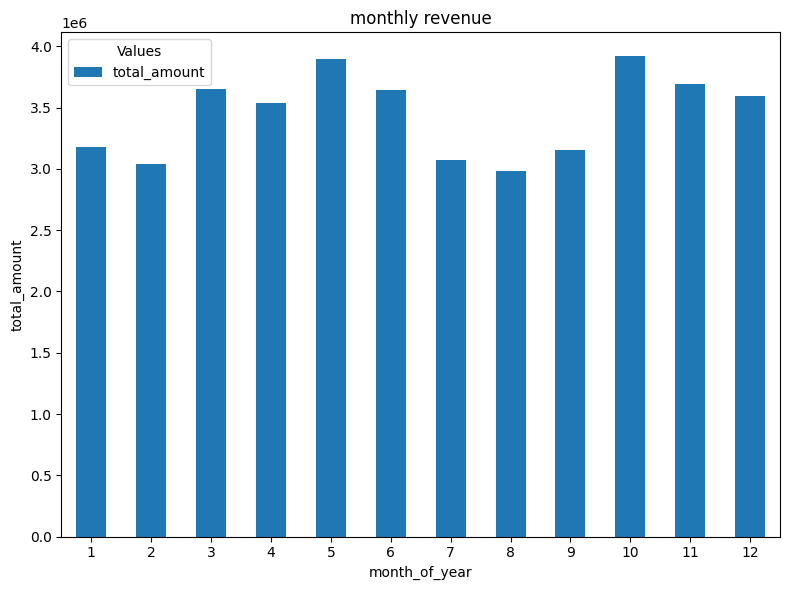

In [51]:
# Group dth ata by monand analyse monthly revenue

grouped_data = df.groupby('month_of_year')[['total_amount']].sum()

# Plotting
grouped_data.plot(kind='bar', figsize=(8, 6))
plt.title('monthly revenue')
plt.xlabel('month_of_year')
plt.ylabel('total_amount')
plt.xticks(rotation=0)
plt.legend(title='Values')
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [52]:
# Calculate proportion of each quarter
df["quarter_of_year"] = pd.to_datetime (df["tpep_pickup_datetime"]).dt.quarter
grouped_data = df.groupby('quarter_of_year')[['total_amount']].sum().reset_index()

total = grouped_data['total_amount'].sum()

grouped_data['percentage'] = (grouped_data['total_amount'] / total) * 100

plt.pie(grouped_data['percentage'],labels=grouped_data["quarter_of_year"], autopct='%.2f%%')
plt.title('quarterly_revenue')
plt.ylabel('')  # Hide default y-axis label
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [53]:
# Show how trip fare is affected by distance

sns.lineplot(x='trip_distance',y= "fare_amount",data=df)
plt.xlabel("trip distance")
plt.ylabel('fare amount')
plt.title('relation between trip distance and fare amount')


Text(0.5, 1.0, 'relation between trip distance and fare amount')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

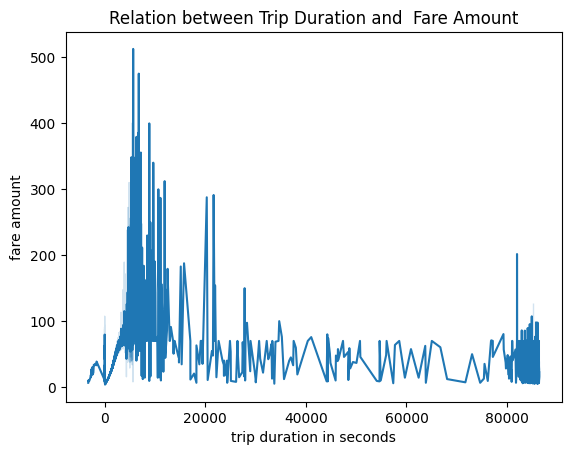

In [54]:
# Show relationship between fare and trip duration
#df['trip_duration'] = 
df['start_time'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['end_time'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration'] = df['end_time'] - df['start_time']
df['duration_in_seconds'] = df['duration'].dt.total_seconds()

#now plot the relation
sns.lineplot(data = df,x='duration_in_seconds', y='fare_amount')
plt.title("Relation between Trip Duration and  Fare Amount")
plt.xlabel("trip duration in seconds")
plt.ylabel('fare amount')
plt.show()

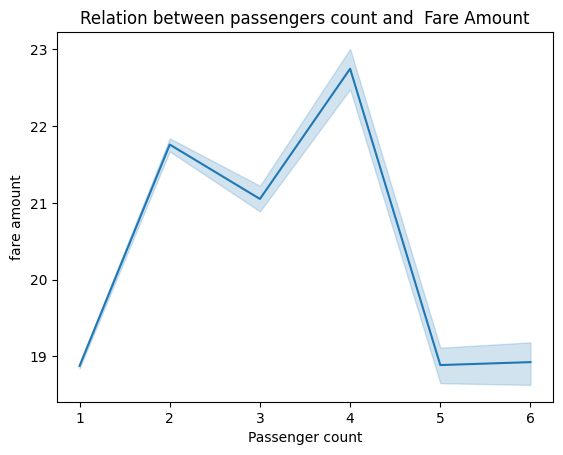

In [55]:
# Show relationship between fare and number of passengers

sns.lineplot(data = df,x='passenger_count', y='fare_amount')
plt.title("Relation between passengers count and  Fare Amount")
plt.xlabel("Passenger count")
plt.ylabel('fare amount')
plt.show()

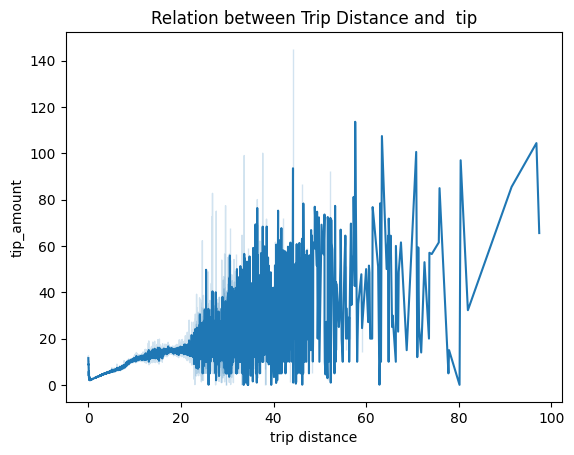

In [56]:
# Show relationship between tip and trip distance

sns.lineplot(data = df,x='trip_distance', y='tip_amount')
plt.title("Relation between Trip Distance and  tip")
plt.ylabel("tip_amount")
plt.xlabel('trip distance')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [58]:

grouped_data = df.groupby('payment_type')[['total_amount']].sum().reset_index()

total = grouped_data['total_amount'].sum()

grouped_data['percentage'] = (grouped_data['total_amount'] / total) * 100

plt.pie(grouped_data['percentage'],labels=grouped_data["payment_type"], autopct='%.2f%%')
plt.title('payment_type')
plt.ylabel('')  # Hide default y-axis label
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [59]:
!pip install geopandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [60]:
import geopandas as gpd

# Read the shapefile using geopandas
# read the .shp file using gpd
zones = gpd.read_file("C:\\Users\\Singhpan\\Exercise_AI_ML\\Datasets_and_Dictionary_NYC\\taxi_zones\\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

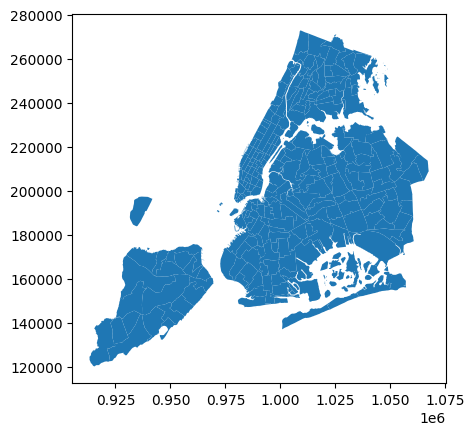

In [61]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [62]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df,zones,
                     left_on='PULocationID',
                     right_on='LocationID',
                     how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392112 entries, 0 to 1392111
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   Unnamed: 0             1392075 non-null  float64        
 1   VendorID               1392075 non-null  float64        
 2   tpep_pickup_datetime   1392075 non-null  object         
 3   tpep_dropoff_datetime  1392075 non-null  object         
 4   passenger_count        1392075 non-null  float64        
 5   trip_distance          1392075 non-null  float64        
 6   RatecodeID             1392075 non-null  float64        
 7   store_and_fwd_flag     1392075 non-null  object         
 8   PULocationID           1392075 non-null  float64        
 9   DOLocationID           1392075 non-null  float64        
 10  payment_type           1392075 non-null  float64        
 11  fare_amount            1392075 non-null  float64        
 12  extra         

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [63]:
# Group data by location and calculate the number of trips
grouped_data = df.groupby('PULocationID').size().reset_index(name='number_of_trips')
print(grouped_data)

     PULocationID  number_of_trips
0               1               28
1               2                1
2               3                4
3               4             1349
4               6                2
..            ...              ...
223           261             6818
224           262            18849
225           263            27254
226           264            12263
227           265              164

[228 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [66]:
# Merge trip counts back to the zones GeoDataFrame
zones= zones.merge(grouped_data, left_on='LocationID', right_on='PULocationID', how='left')
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OBJECTID           263 non-null    int32   
 1   Shape_Leng         263 non-null    float64 
 2   Shape_Area         263 non-null    float64 
 3   zone               263 non-null    object  
 4   LocationID         263 non-null    int32   
 5   borough            263 non-null    object  
 6   geometry           263 non-null    geometry
 7   PULocationID_x     226 non-null    float64 
 8   number_of_trips_x  226 non-null    float64 
 9   PULocationID_y     226 non-null    float64 
 10  number_of_trips_y  226 non-null    float64 
 11  PULocationID       226 non-null    float64 
 12  number_of_trips    226 non-null    float64 
dtypes: float64(8), geometry(1), int32(2), object(2)
memory usage: 24.8+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

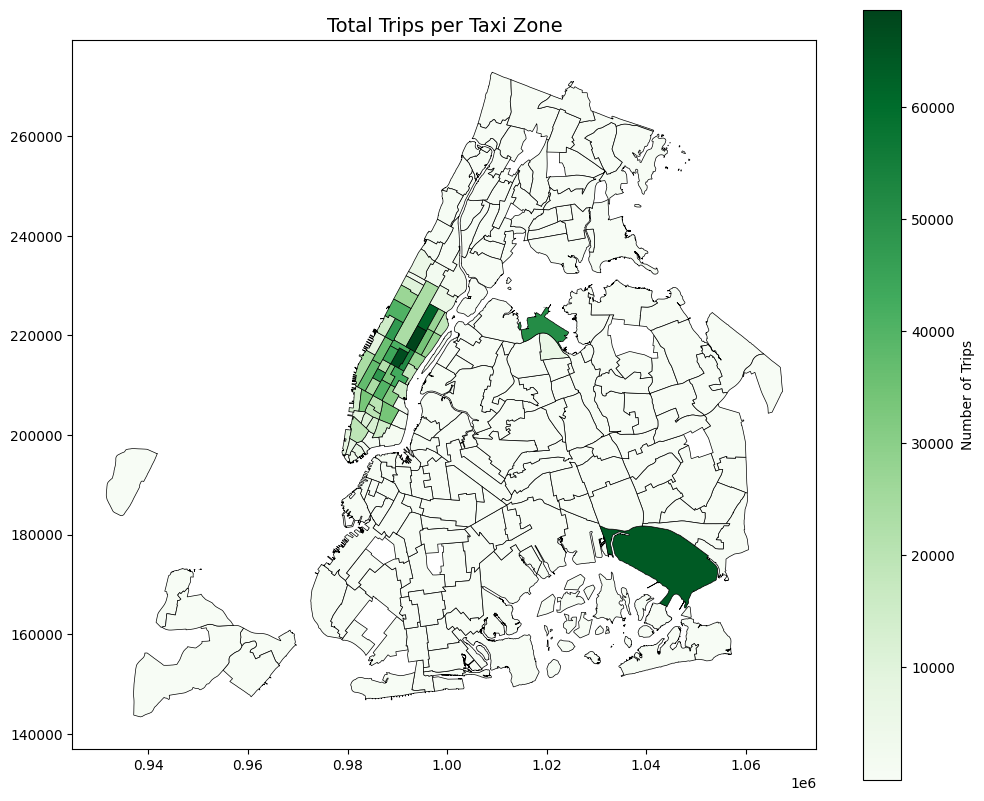

In [600]:
# Define figure and axis
figure, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='number of trips', cmap='Greens', linewidth=0.5, edgecolor='black', legend = True, ax=ax, legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})

ax.set_title("Total Trips per Taxi Zone", fontsize=14)
#ax.axis("off")
plt.show()


In [561]:
# can you try displaying the zones DF sorted by the number of trips?
print((zones.sort_values(by='number of trips', ascending=False)))


     OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
236       237    0.042213    0.000096      Upper East Side South         237   
160       161    0.035804    0.000072             Midtown Center         161   
131       132    0.245479    0.002038                JFK Airport         132   
235       236    0.044252    0.000103      Upper East Side North         236   
161       162    0.035270    0.000048               Midtown East         162   
..        ...         ...         ...                        ...         ...   
200       201    0.130404    0.000619              Rockaway Park         201   
203       204    0.101912    0.000641          Rossville/Woodrow         204   
205       206    0.212757    0.000944  Saint George/New Brighton         206   
220       221    0.166218    0.000890                  Stapleton         221   
244       245    0.095983    0.000466              West Brighton         245   

           borough                     

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [604]:
# Find routes which have the slowest speeds at different times of the day

#We have trip duration is seconds so convert it to hour and find avg speed in m/h
merged_df["Avg_speed"] = (merged_df["duration_in_seconds"]/3600)
#now we have average speed so group data with location id to find slow route

slow_routes = merged_df.groupby(["PULocationID", "DOLocationID", "Pick_up_hour"])["Avg_speed"].mean().reset_index()
print(slow_routes.sort_values(by='Avg_speed', ascending=True))

       PULocationID  DOLocationID  Pick_up_hour  Avg_speed
84973         234.0         125.0           1.0  -0.070278
0               0.0           0.0           0.0   0.000000
19799          80.0          80.0          21.0   0.000000
28939         112.0         112.0          17.0   0.000278
17              1.0         264.0           8.0   0.000278
...             ...           ...           ...        ...
61164         162.0         166.0           3.0  23.922222
20229          87.0          49.0          10.0  23.934444
55903         152.0         107.0          19.0  23.949444
56648         158.0          97.0           2.0  23.950556
4007           33.0         148.0          19.0  23.963056

[103227 rows x 4 columns]


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Text(0.5, 1.0, 'Hourly Trends in Taxi Pickups')

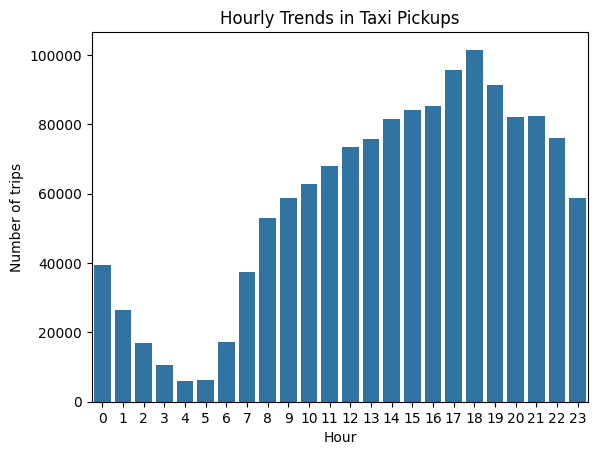

In [67]:
# Visualise the number of trips per hour and find the busiest hour
sns.countplot(x='Pick_up_hour',data=df)
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.title('Hourly Trends in Taxi Pickups')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [68]:
# Scale up the number of trips
sample_size = 0.05
trips_per_hour = df['Pick_up_hour'].value_counts()
actual_trips_per_hour = trips_per_hour / sample_size
print(actual_trips_per_hour)
# Fill in the value of your sampling fraction and use that to scale up the number
## so top 5 hours are - 18,17,19,16,15

Pick_up_hour
18    2030840.0
17    1914000.0
19    1829600.0
16    1706420.0
15    1681960.0
21    1650440.0
20    1645160.0
14    1633760.0
22    1521000.0
13    1513240.0
12    1469120.0
11    1360420.0
10    1258760.0
9     1177720.0
23    1176180.0
8     1059500.0
0      787920.0
7      749200.0
1      528340.0
6      346320.0
2      339500.0
3      211720.0
5      127820.0
4      121960.0
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [2]:
# Compare traffic trends for the week days and weekend
df.info()
traffic_trend = df.groupby(["day_of_week", "Pick_up_hour"])["PULocationID"].size().reset_index()
#df["weekend"] = df["day_of_week"].dt.
print(traffic_trend)


NameError: name 'df' is not defined

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [78]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1392045 entries, 0 to 1896399
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   Unnamed: 0             1392045 non-null  int64          
 1   VendorID               1392045 non-null  int64          
 2   tpep_pickup_datetime   1392045 non-null  object         
 3   tpep_dropoff_datetime  1392045 non-null  object         
 4   passenger_count        1392045 non-null  float64        
 5   trip_distance          1392045 non-null  float64        
 6   RatecodeID             1392045 non-null  float64        
 7   store_and_fwd_flag     1392045 non-null  object         
 8   PULocationID           1392045 non-null  int64          
 9   DOLocationID           1392045 non-null  int64          
 10  payment_type           1392045 non-null  int64          
 11  fare_amount            1392045 non-null  float64        
 12  extra              

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [80]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
night_hours = [23, 0, 1, 2, 3, 4, 5]
late_night_pickup = df[df['Pick_up_hour'].isin(night_hours)]

print(late_night_pickup['PULocationID'].value_counts().nlargest(10))

print(late_night_pickup['DOLocationID'].value_counts().nlargest(10))


PULocationID
79     12664
249    10486
132     9656
148     7803
48      7795
114     7130
230     5736
186     5459
164     4805
138     4764
Name: count, dtype: int64
DOLocationID
79     6646
48     5161
170    5122
107    4600
68     4430
141    4402
263    4250
249    4119
239    3673
236    3588
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [82]:
# Filter for night hours (11 PM to 5 AM)
plt.bar(late_night_pickup['PULocationID'],late_night_pickup['fare_amount'] )
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

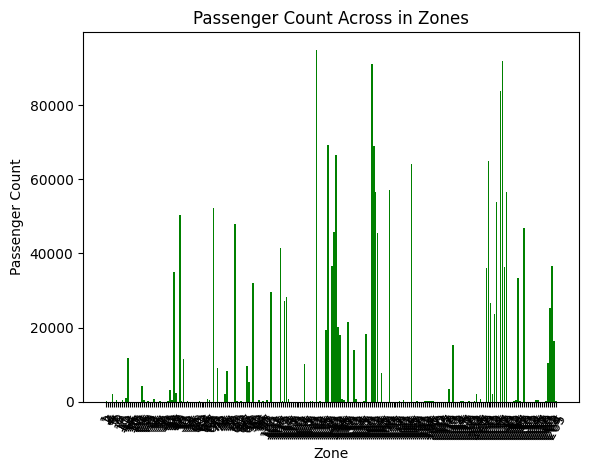

     PULocationID  passenger_count
0               1             48.0
1               2              1.0
2               3              6.0
3               4           1959.0
4               6              5.0
..            ...              ...
223           261          10443.0
224           262          25248.0
225           263          36554.0
226           264          16452.0
227           265            231.0

[228 rows x 2 columns]


In [76]:
# How does passenger count vary across zones
# How does passenger count vary across zones
passenger_Zone_dist = df.groupby('PULocationID')['passenger_count'].sum().reset_index()
plt.bar(passenger_Zone_dist['PULocationID'].astype(str), passenger_Zone_dist['passenger_count'], color='Green')
plt.xlabel("Zone")
plt.ylabel("Passenger Count")
plt.title("Passenger Count Across in Zones")
plt.xticks(rotation=60)
plt.show()
print(passenger_Zone_dist)


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [69]:
# How often is each surcharge applied?
#create the dict for all type charges
surcharge_applied = {
    "Extra Charge": (df['extra'] > 0).sum(),
    "Congestion Surcharge": (df['congestion_surcharge'] > 0).sum(),
    "Airport Fee": (df['total_airport_fee'] > 0).sum()
}

surcharge = pd.DataFrame(list(surcharge_applied.items()), columns=['Surcharge Type', 'Count'])

plt.bar(surcharge['Surcharge Type'], surcharge['Count'])
plt.xlabel("Surcharge")
plt.ylabel("NumberTrips")
plt.title("How Often is Each Surcharge Applied ?")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.